In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
dataset = pd.read_csv('Datasets/updated_final_feature_dataset.csv')
X = dataset.drop(['Winner', 'Home Goals', 'Away Goals', 'Season', 'Home Team', 'Away Team'], axis=1)
y = dataset['Winner']

print(dataset.columns)


Index(['Season', 'Home Team', 'Away Team', 'Home Goals', 'Away Goals',
       'Home Team ELO', 'Away Team ELO', 'Home XG', 'Away XG', 'Home XGA',
       'Away XGA', 'Home Win Percentage', 'Home Draw Percentage',
       'Away Win Percentage', 'Away Draw Percentage', 'Home Team Form',
       'Away Team Form', 'Home Team Cumulative Points',
       'Away Team Cumulative Points', 'Winner', 'Home Team Form Statistics',
       'Away Team Form Statistics'],
      dtype='object')


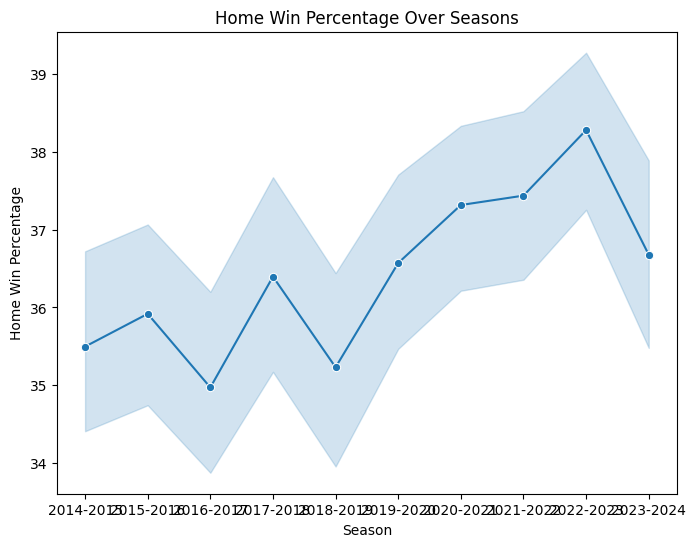

In [24]:
# 7. Seasonal Trends
# Seasonal trends in Home Win Percentage
plt.figure(figsize=(8, 6))
sns.lineplot(x='Season', y='Home Win Percentage', data=dataset, marker='o')
plt.title('Home Win Percentage Over Seasons')
plt.xlabel('Season')
plt.ylabel('Home Win Percentage')
plt.show()


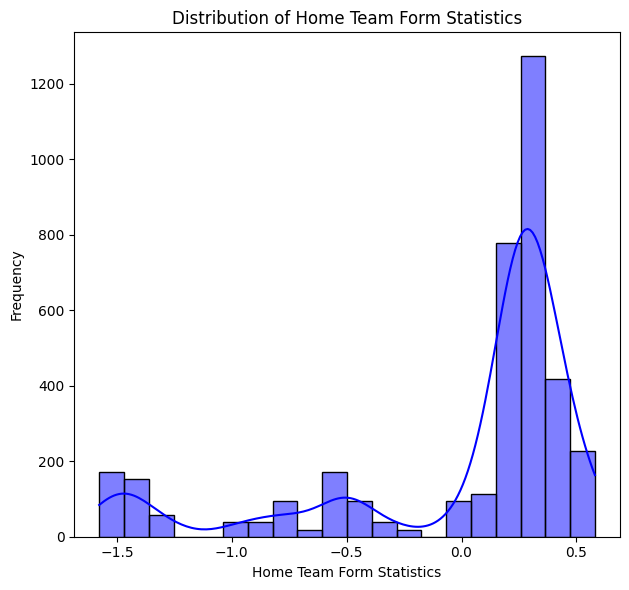

In [25]:
# 1. Distribution of Home and Away Team Form Statistics
plt.figure(figsize=(12, 6))

# Home Team Form Statistics distribution
plt.subplot(1, 2, 1)
sns.histplot(dataset['Home Team Form Statistics'], kde=True, color='blue', bins=20)
plt.title('Distribution of Home Team Form Statistics')
plt.xlabel('Home Team Form Statistics')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

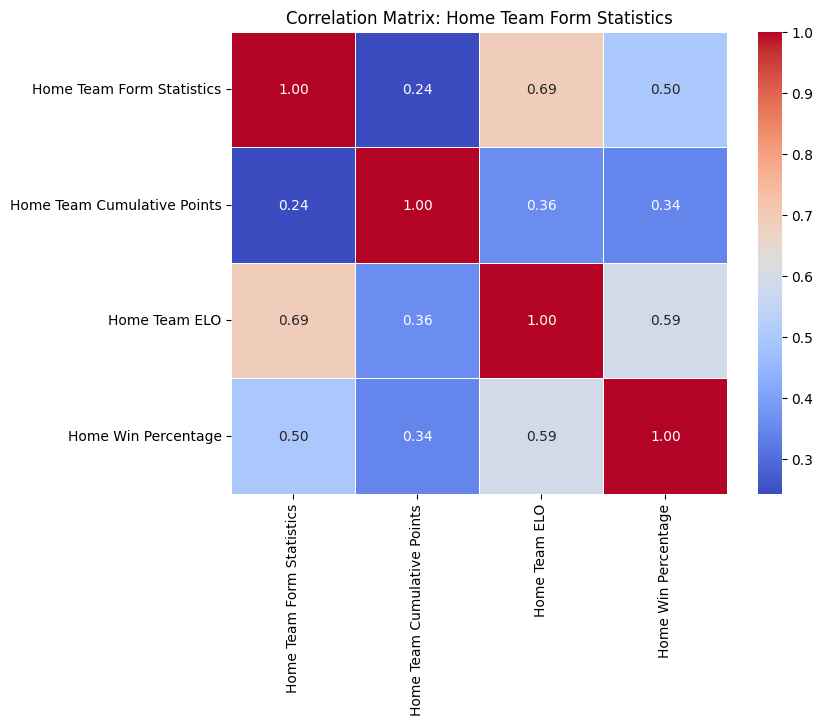

In [26]:
# 2. Correlation Matrix for Home and Away Team Form Statistics with other features
home_form_corr = dataset[['Home Team Form Statistics', 'Home Team Cumulative Points', 'Home Team ELO', 'Home Win Percentage']].corr()
away_form_corr = dataset[['Away Team Form Statistics', 'Away Team Cumulative Points', 'Away Team ELO', 'Away Win Percentage']].corr()

# Plot Home Form Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(home_form_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Home Team Form Statistics')
plt.show()
